## 이미지 다루기 Image handling with Pillow
- Pillow
    - python에서 이미지 처리 작업을 수행하기 위해 사용되는 라이브러리
    - PIL에서 시작되었으나, 유지보수되지 않자 커뮤니티에서 발전시켜 나온 것
    - 다양한 이미지 파일 포맷을 지원하고, 이미지의 열기, 편집, 저장, 변환 등을 쉽게 할 수 있도록 도와준다.

In [ ]:
# 이미지 열기
from PIL import Image
fruit = Image.open("./Image/fruit.jpg")
fruit.show()

# 이미지 정보 확인
print(fruit.size)
print(fruit.format)
print(fruit.mode)

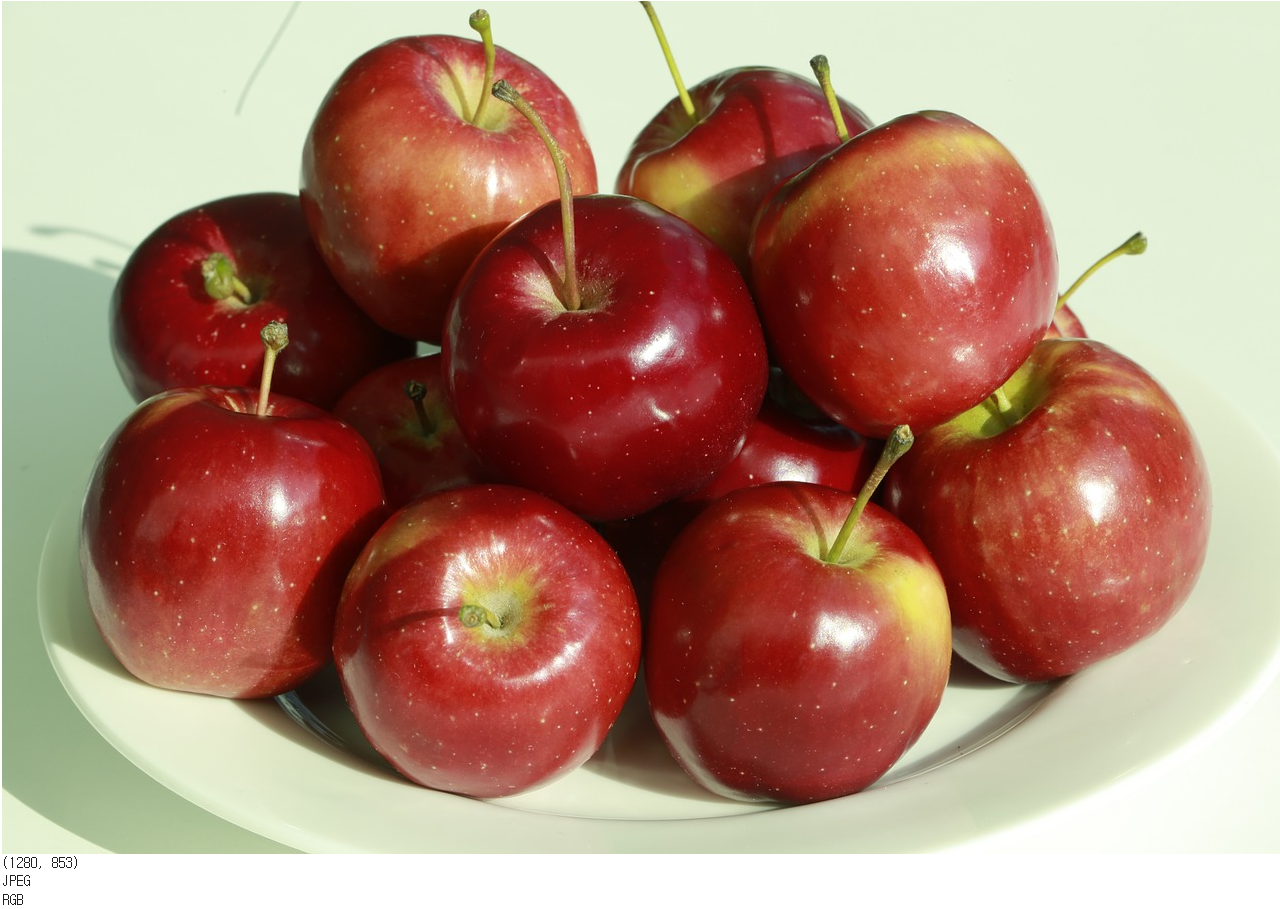

In [ ]:
# 이미지 크롭
# 시작 x좌표, 시작 y좌표, 끝 x좌표, 끝 y좌표
area = (200, 150, 350, 300)
cropped_fruit = fruit.crop(area)
cropped_fruit.show()

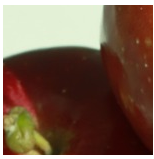

### RGB 채널
- 이미지는 일반적으로 한 픽셀에 빛의 삼원색인 Red, Green, Blue의 밝기 정보를 담고 있다.
- 빛의 세기는 8비트를 주로 사용
- 256*256*256 = 16777216가지 색을 표현 가능

In [ ]:
# RGB 채널 분리
r, g, b = fruit.split()

# RGB 채널 병합
new_fruit = Image.merge("RGB", (r, g, b))

# 이미지 회전
rotated_fruit = fruit.rotate(45)

# 이미지 뒤집기
from PIL import ImageOps
flipped_fruit = ImageOps.flip(fruit)
mirrored_fruit = ImageOps.mirror(fruit)

# 테두리 그리기
border_fruit = ImageOps.expand(fruit, border=5, fill="#C9C9C9")
border_fruit.show()

In [ ]:
# 도형 그리기
from PIL import ImageDraw
fruit_and_shapes = fruit.copy()
draw = ImageDraw.Draw(fruit_and_shapes)
# 사각형
draw.rectangle(((20,150), (100,250)), outline="black", width=3, fill="#F0F0F0")
# 원
draw.ellipse(((150,80),(230,160)), outline="red", width=5)
# O각형
coords = ((250, 180), (290,140), (370,110), (400,120),(330,200),(280,220))
draw.polygon(coords, outline=None, fill="white")
# 선
draw.line(((20,280),(580,280)), fill="#6CF", width=10)

In [ ]:
# URL 통해 이미지 가져오기
from PIL import Image
import requests

url = "https://www.python.org/static/img/python-logo.png"
logo = Image.open(requests.get(url, stream=True).raw)
logo.show()

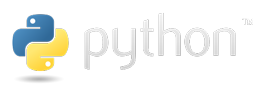

In [ ]:
# 리사이즈 해서 이미지 병합
cat = Image.open("./Image/cat.jpg")
fruitandcat = fruit.copy()
small_cat = cat.resize((150,150))
fruitandcat.paste(small_cat, (0,0))
fruitandcat.show()

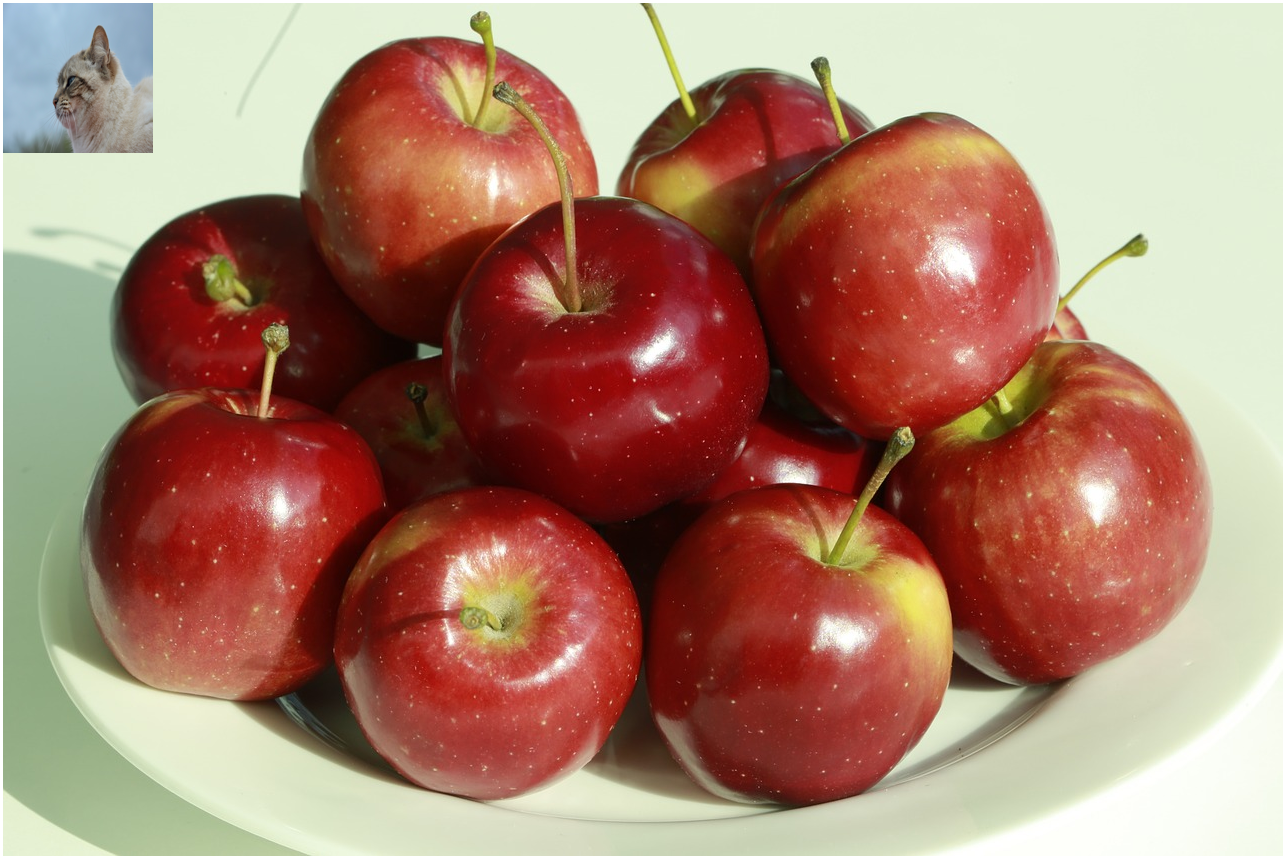

In [ ]:
# 사진 바둑판식 배치
img = Image.new("RGB", (600, 400))
small_fruit = fruit.resize((300,200))
small_cat = cat.resize((300, 200))
img.paste(small_fruit, (0,0))
img.paste(small_cat, (300,0))
img.paste(small_fruit, (300,200))
img.paste(small_cat, (0,200))
img.show()

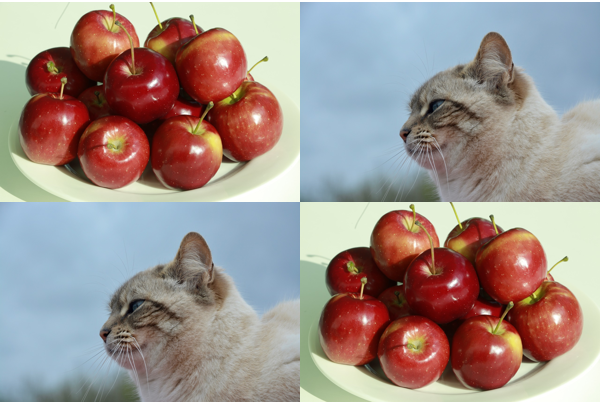

In [ ]:
# 많은 고양이 사진
lotsofcats = Image.new("RGB", (600,400))
small_cat = cat.resize((150, 140))
for i in range(0,4):
    for j in range(0, 4):
        lotsofcats.paste(small_cat, (i*150, j*150))
lotsofcats.show()

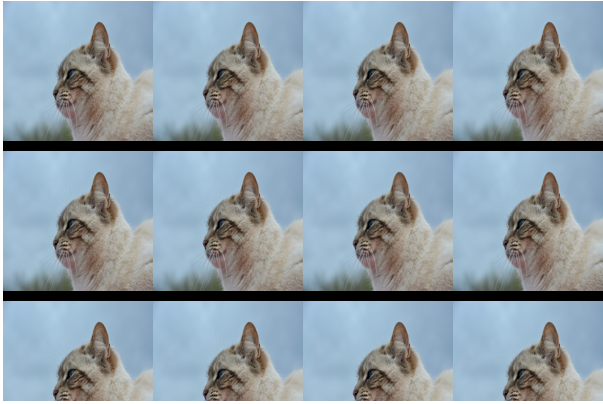

In [ ]:
# 필터 적용
from PIL import ImageFilter
cat = Image.open("./Image/cat.jpg")
blurred_cat = cat.filter(ImageFilter.BLUR)
blurred_cat.show()

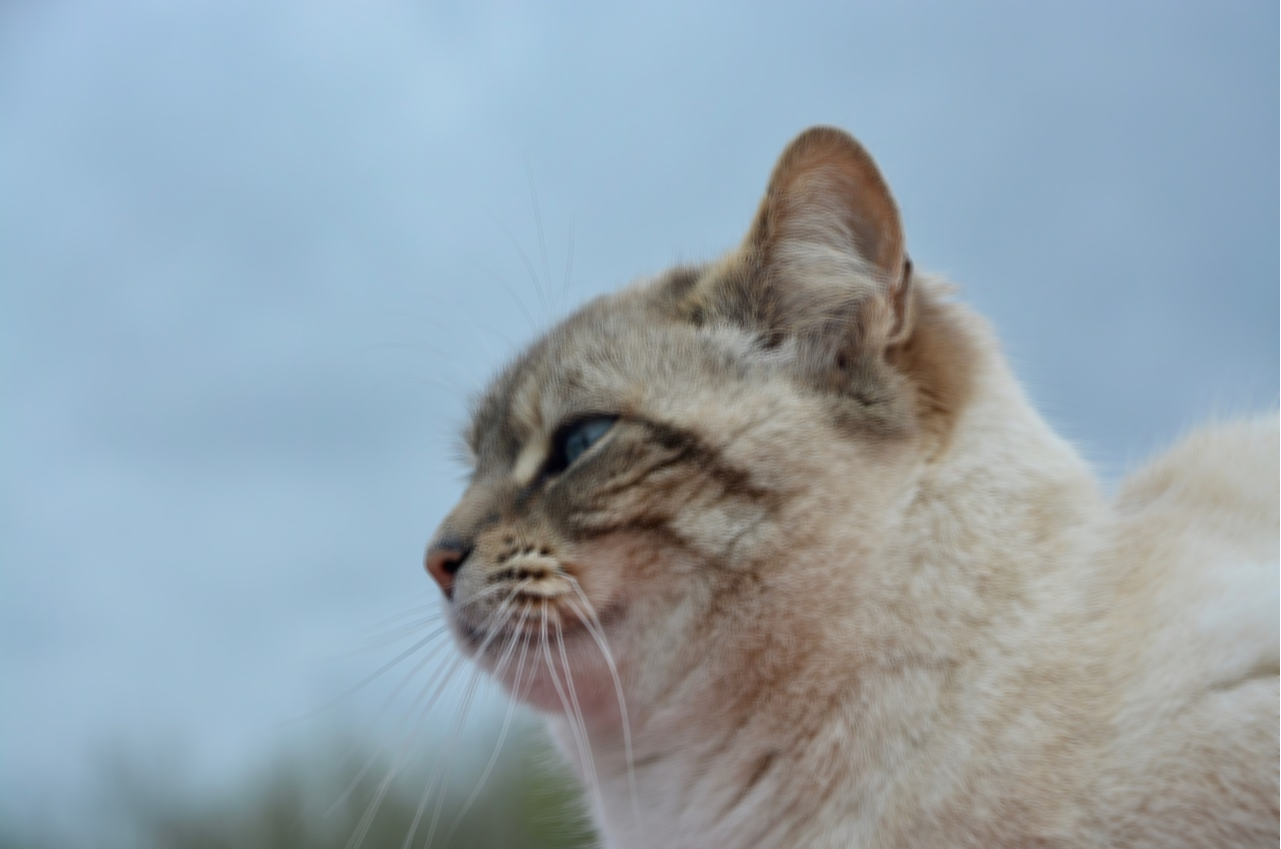

In [ ]:
# 픽셀 단위로 색 그리기
img = Image.new("RGB", (400,400))
pixels = img.load()
w, h = img.size
for i in range(0, w):
    for j in range(0, h):
        b = int((i+j) / (w+h)*255)
        pixels[i,j] = (0, 0, b)
img.show()

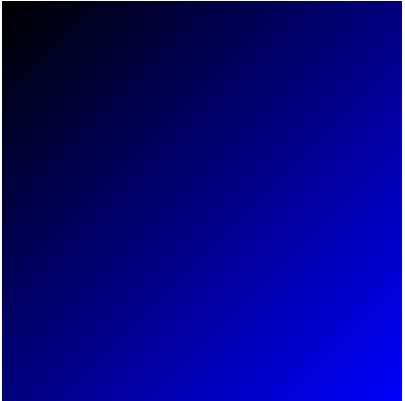